# Machine Learning and Machine Learning Lab Project " Code Implementation"

##import all needed libraries




In [ ]:
!pip install pyclustering


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=352c162ef2ce4d8b107902fea2c2992689ca93bb059c6371d2d218a1c8b5b038
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [ ]:
# import all needed libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from pyclustering.cluster import cluster_visualizer
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from pyclustering.utils import timedcall
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from keras.layers import LSTM, Dropout
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


##Data collection, Preprocessing and EDA

### just to note that we integrated data directly from excel + we dropped two columns ( who is completing this test / region) as they don't match with the other two datasets + we've converted age from one of the datasets from years to months by multiplying it by 12


In [ ]:
Data = pd.read_csv('/content/ASD dataset.csv') # loading the ASD dataset

In [ ]:
Data.shape

(3545, 15)

In [ ]:
Data.head() # it have 15 columns and 3545 records

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Family member with ASD history,Age (months),Gender,Screening Score,Class
0,0,0,1,1,1,0,0,0,0,0,0,32,1,3,0
1,0,0,1,0,0,1,0,1,0,0,0,30,1,3,0
2,0,0,0,1,0,0,0,0,0,0,0,36,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,36,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,36,1,0,0


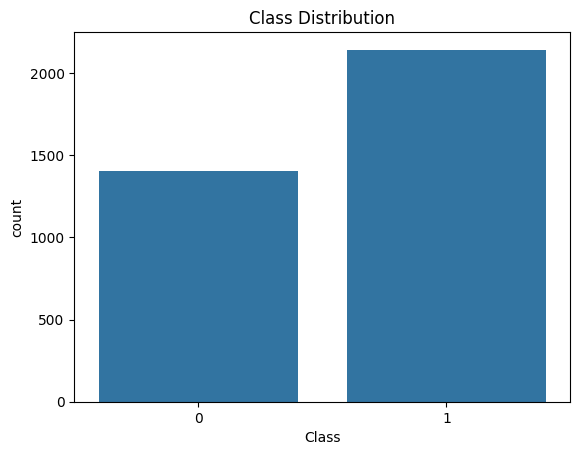

Class
1    2143
0    1402
Name: count, dtype: int64


In [ ]:
# Plot class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Print the number of records in each class
print(data['Class'].value_counts())


### There is no need to balance it, as it is already satisfactory, with a difference of 741 between the values.






In [ ]:
Data.info() # from this we can see that there is no null values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3545 entries, 0 to 3544
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   A10                             3545 non-null   int64
 1   A9                              3545 non-null   int64
 2   A8                              3545 non-null   int64
 3   A7                              3545 non-null   int64
 4   A6                              3545 non-null   int64
 5   A5                              3545 non-null   int64
 6   A4                              3545 non-null   int64
 7   A3                              3545 non-null   int64
 8   A2                              3545 non-null   int64
 9   A1                              3545 non-null   int64
 10  Family member with ASD history  3545 non-null   int64
 11  Age (months)                    3545 non-null   int64
 12  Gender                          3545 non-null   int64
 13  Scr

In [ ]:
Data.isnull().sum() # we can see here more clearly that there is no null values in the 15 columns

,0
A10,0
A9,0
A8,0
A7,0
A6,0
A5,0
A4,0
A3,0
A2,0
A1,0


In [ ]:
Data.describe() # describes the mean,std,etc

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Family member with ASD history,Age (months),Gender,Screening Score,Class
count,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000
mean,0.512835,0.368688,0.355148,0.465444,0.421439,0.391819,0.383357,0.311707,0.336530,0.415515,0.267137,76.446544,0.340197,4.658110,0.604513
std,0.499906,0.482517,0.478626,0.498875,0.493859,0.488226,0.486273,0.463256,0.472589,0.492880,0.442527,58.847735,0.473842,3.015181,0.489024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,2.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,5.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,108.000000,1.000000,7.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,216.000000,1.000000,10.000000,1.000000


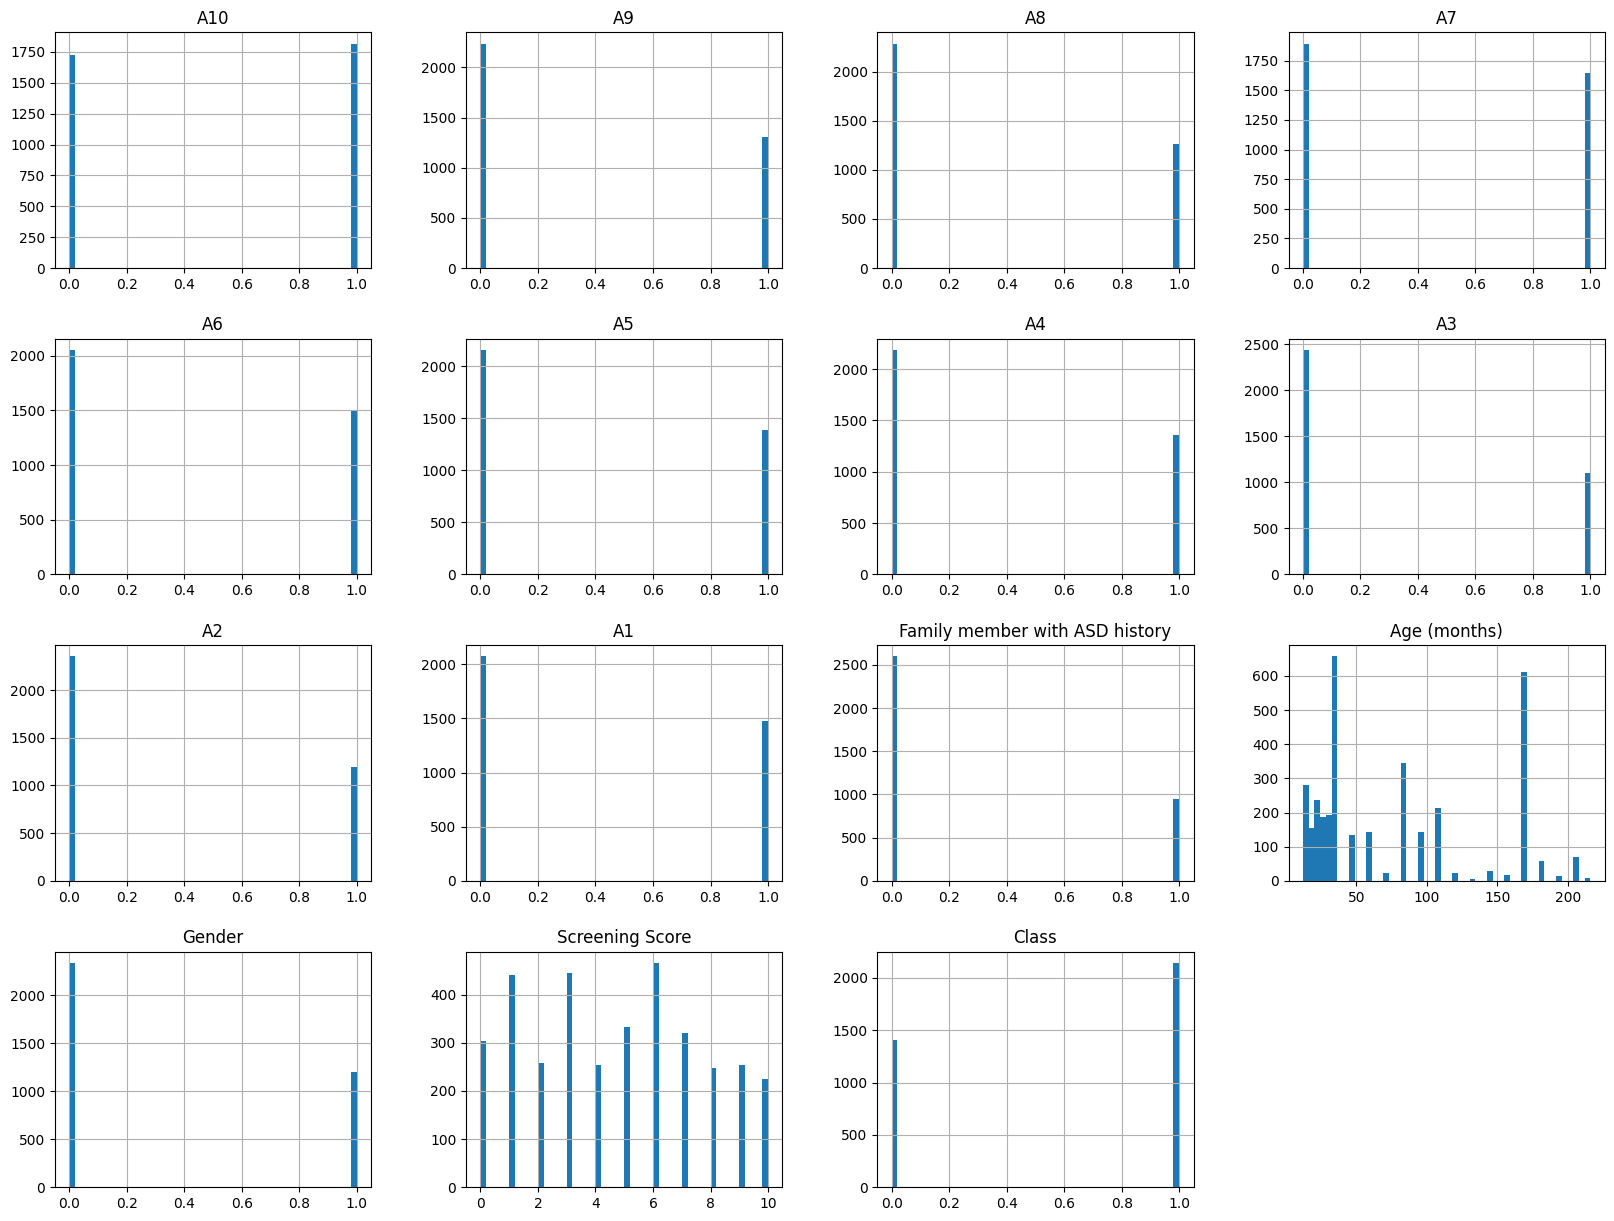

In [ ]:
# here we are plotting a histogram to visualize the dataset
# we can see that most of them contains two columns which indicates for either 0 or 1 as most of the dataset is binary classification
Data.hist(bins=50, figsize=(20,15))
plt.show()

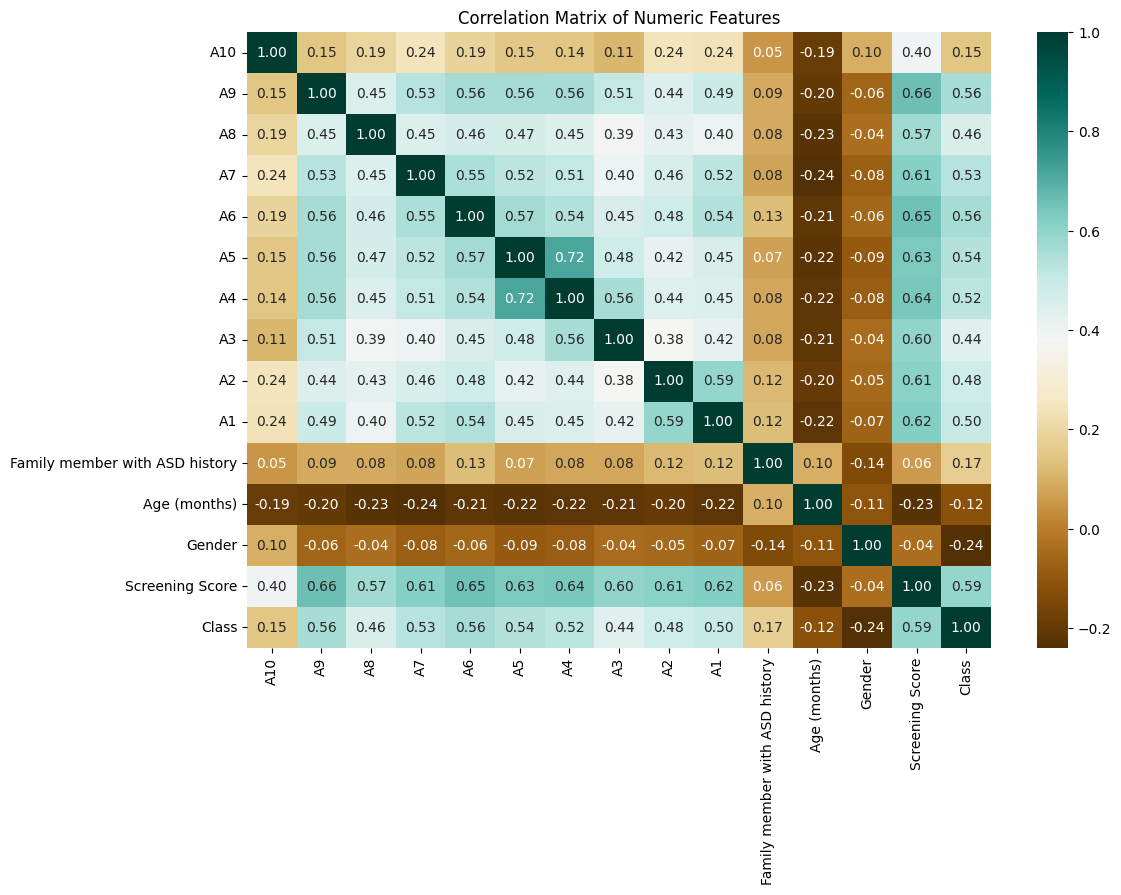

In [ ]:
#visualizing the correlation using heatmap
numeric_features = Data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the size as necessary
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='BrBG')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## we can see that the most correlated attributes are A4 and A5 with a results of 0.72
## and the most uncorrelated attributes are gender and class / A7 and age with a result of -0.24

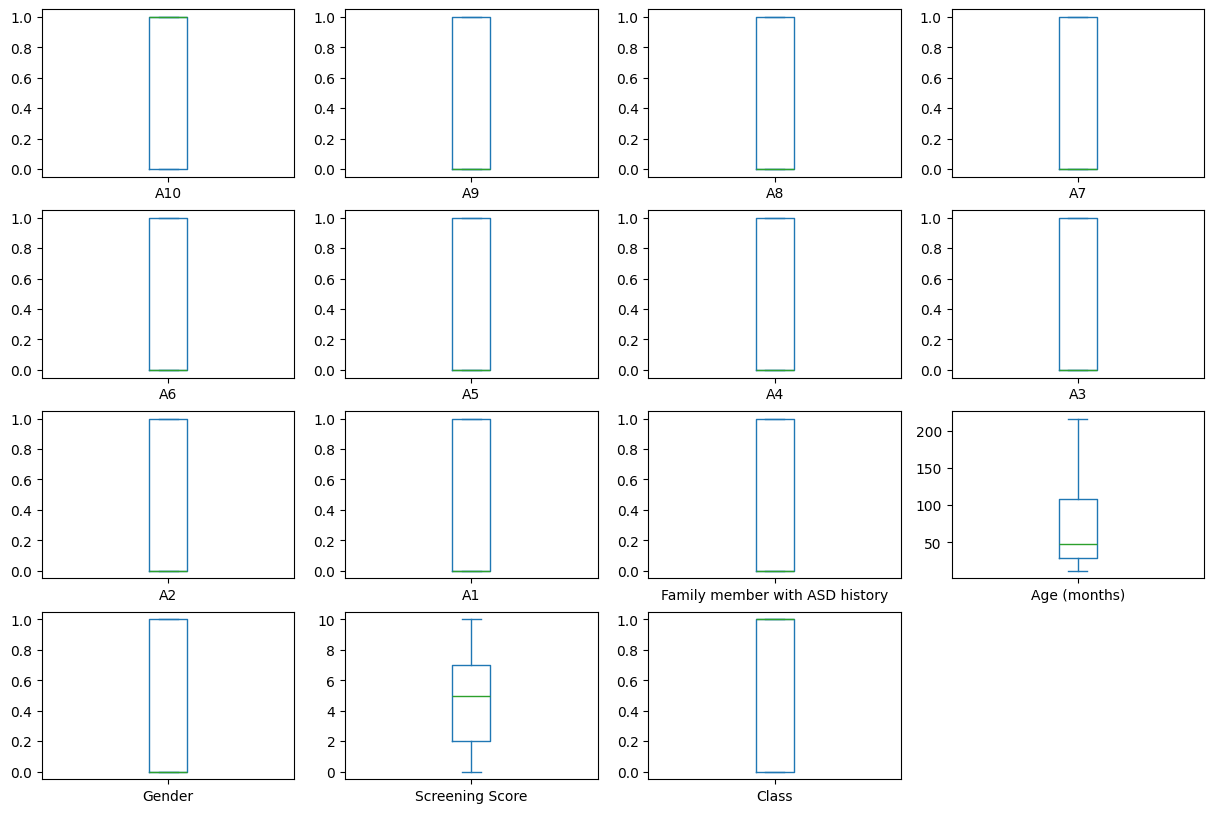

In [ ]:
# here we are plotting a boxplot to visualize the dataset as boxplot helps us to determine if there is an outliers in our dataset
numerical_features = Data.select_dtypes(include=['int64', 'float64']).columns
Data[numerical_features].plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()
## we can see that most of them having like a one rectangluar shape and thats because the columns are binary classified
## the only two are age and screening score and it's obvious that there are no outliers

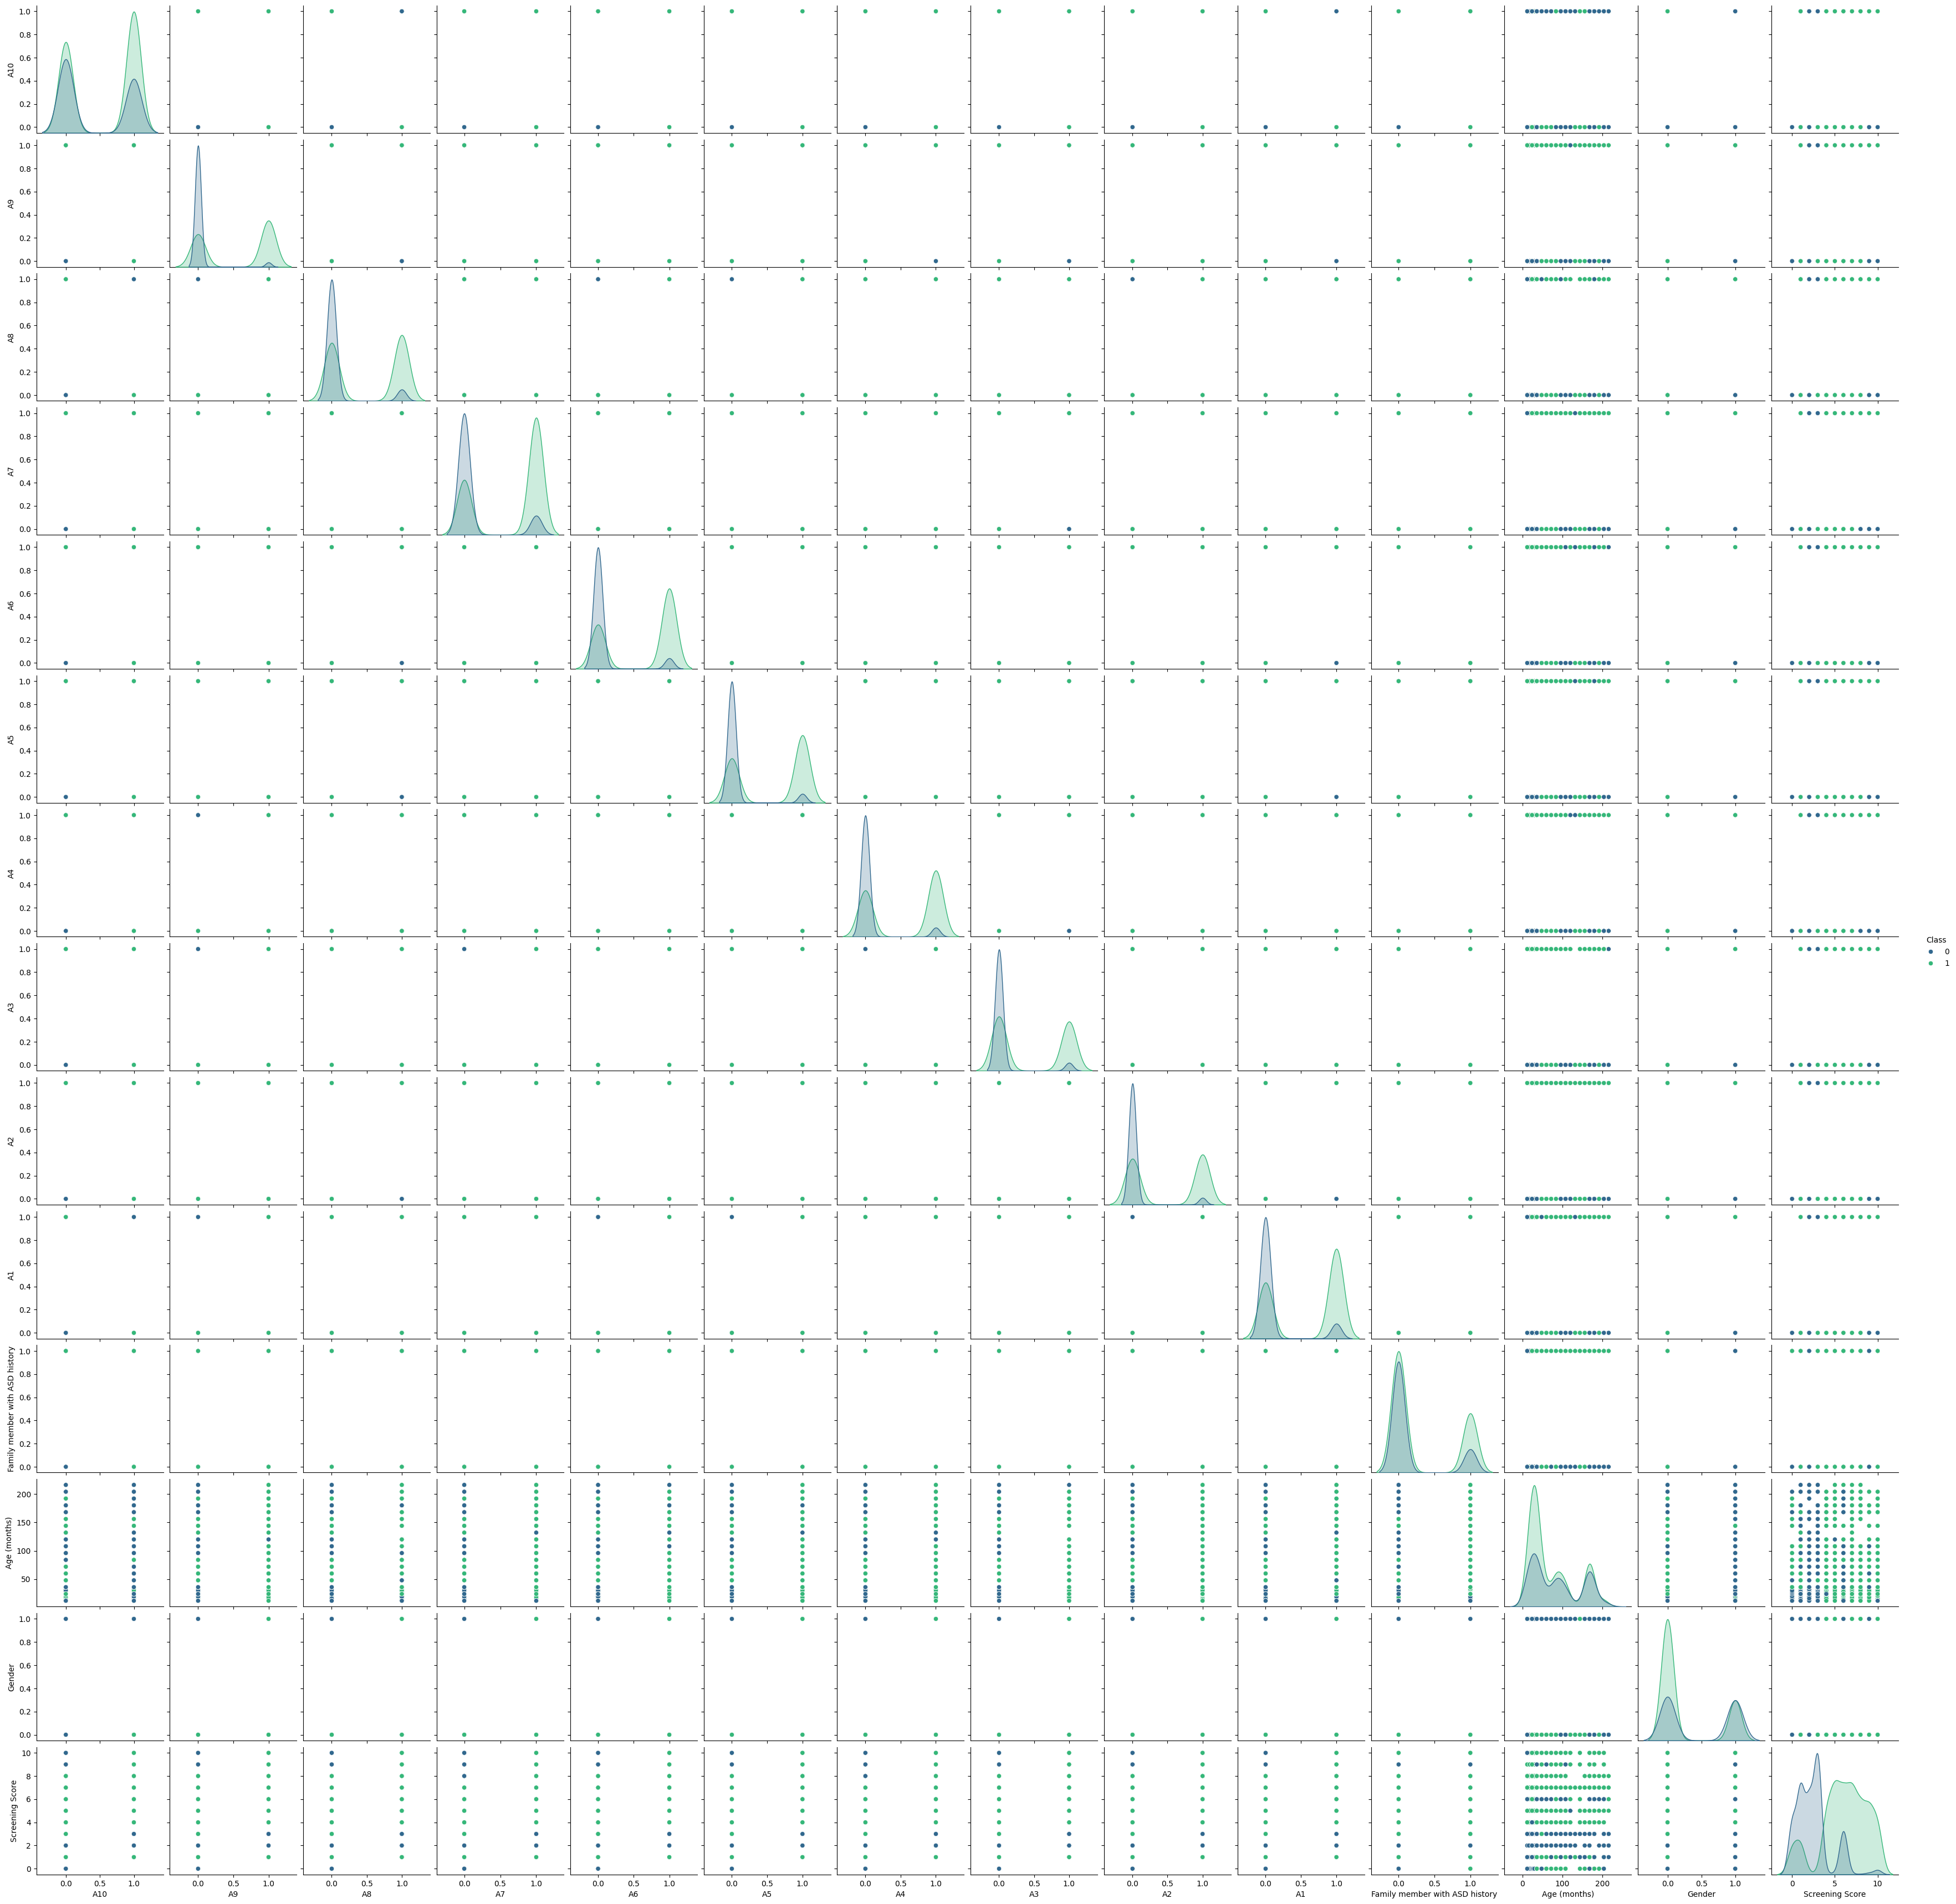

In [ ]:
# here we are plotting a pairplot with a hue of our target column which is class
sns.pairplot(Data, hue='Class',diag_kind='kde', palette='viridis')
plt.show()

### now since we don't have any null values and we can see that we don't have any column to drop we will continue with splitting

In [ ]:
# splitting x and y
X = Data.drop('Class', axis=1)
y = Data['Class']

In [ ]:
# here we are scaling age  and encoding screening score as they are not binary classified
scaler = StandardScaler()
X['Age (months)'] = scaler.fit_transform(X[['Age (months)']])  # Scale Age (numerical feature)

# Binary features don't need encoding but if its needed we can use LabelEncoder or leave them as they are.

# Encode multiclass categorical feature using label encoding
encoder = LabelEncoder()
X['Screening Score'] = encoder.fit_transform(X['Screening Score'])

In [ ]:
# splitting the data into training and testing set into 20/80 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numerical_features = ['Age (months)', 'Screening Score'] # Numerical features to scale

# Apply scaling to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

# Apply the transformations for both x_train and x_test:
X_train_processed = preprocessor.fit_transform(x_train) # fitting and transforming
X_test_processed = preprocessor.transform(x_test)  # transforming

#### All needed Data collection, Preprocessing and EDA were done and it's ready for modelling!!!

##Supervised Learning (Regression or Classification)

### Literature review models (4)

#### support vector machine (SVM)

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Accuracy: 0.9541601460615545
Cross-Validation Accuracy Scores: [0.92605634 0.92945326 0.92592593 0.92945326 0.89241623]
Mean Cross-Validation Accuracy: 0.9206610030553692
SVM Model Evaluation:
Accuracy: 0.9323
Precision: 0.9663
Recall: 0.9218
F1-score: 0.9435


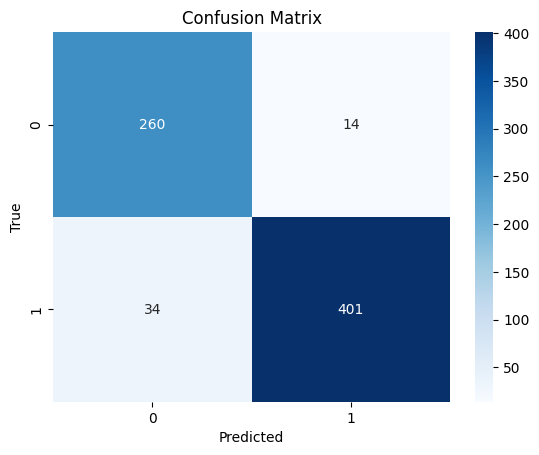

In [ ]:
# svm model
svm_model = SVC()

# define parameter grid for grid search cross validation
param_grid = {
    'C': [0.1, 1, 10], # regularization parameter
    'kernel': ['linear', 'rbf'], #kernel type either linear or radial basis function
}

# Grid search cross-validation
svm_cv = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')  # Use accuracy as the scoring metric and 5-fold cv
svm_cv.fit(x_train, y_train) #fitting grid search in training data

# we are getting the best parameter and best score from grid search
best_params = svm_cv.best_params_
best_accuracy = svm_cv.best_score_
# we are performing cross validation on the svm with the best parameter
cv_scores = cross_val_score(svm_model, x_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)

# printing results best parameter, best accuracy from grid search, cv score and mean of cs scores
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

#training the svm model to training data and predict the labels for test set
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# print results of all
print("SVM Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

####k-nearest neighbors (KNN)








/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best Accuracy: 0.9591002806965248
Cross-Validation Accuracy Scores: [0.95070423 0.95943563 0.97530864 0.9664903  0.94356261]
Mean Cross-Validation Accuracy: 0.9591002806965248
KNN Model Evaluation:
Accuracy: 0.9718
Precision: 0.9601
Recall: 0.9954
F1-score: 0.9774


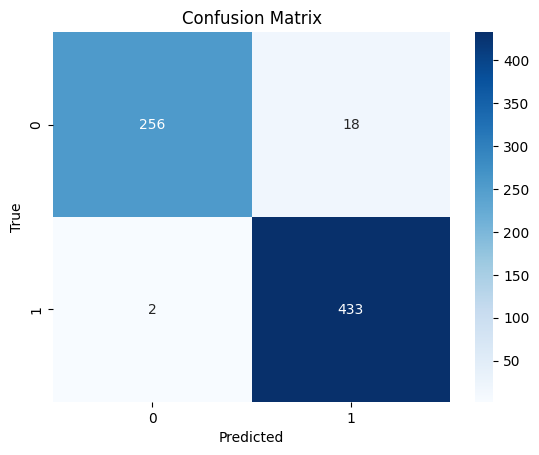

In [ ]:
# KNN model
knn_model = KNeighborsClassifier()

# define parameter grid for grid search cross validation
param_grid = {
    'n_neighbors': [3, 5, 7, 9], # number of neighbors for KNN
    'weights': ['uniform', 'distance'], # weight function (uniform -> all neighbors equal) (distance -> closer neighbors have more weight)
    'p': [1, 2]  # 1 -> Manhattan distance, 2 -> Euclidean distance
}

# Grid search cross-validation to tune hyperparameters
knn_cv = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
knn_cv.fit(x_train, y_train)

# we are getting the best parameter and best score from grid search
best_params = knn_cv.best_params_
best_accuracy = knn_cv.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Instantiate a new KNN model with the best parameters found from grid search
best_knn_model = KNeighborsClassifier(**best_params)

# we are performing cross validation on the KNN with the best parameter
cv_scores = cross_val_score(best_knn_model, x_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)

#print cv score and mean cv
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

#train the KNN with the best parameters
best_knn_model.fit(x_train, y_train)
y_pred = best_knn_model.predict(x_test)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# print results of all
print("KNN Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

####decision tree (DT)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy: 0.9573378542862111
Cross-Validation Accuracy Scores: [0.9471831  0.96296296 0.96825397 0.96119929 0.94885362]
Mean Cross-Validation Accuracy: 0.9576905879722781
Decision Tree Model Evaluation:
Accuracy: 0.9690
Precision: 0.9769
Recall: 0.9724
F1-score: 0.9747


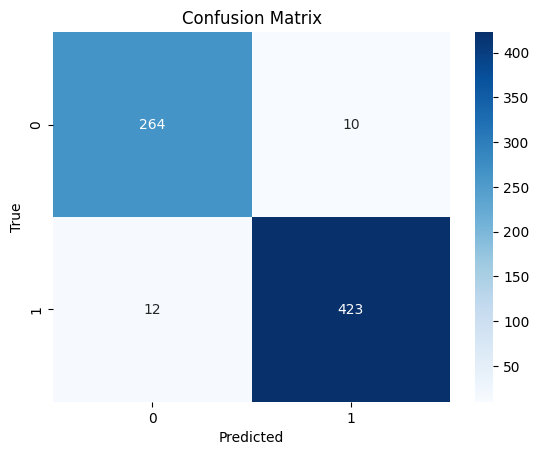

In [ ]:
# Reshape x_train to 2D if it has 3 dimensions
if x_train.ndim == 3:
    x_train = x_train.reshape(x_train.shape[0], -1) # here it flatten the input to 2D (samples,features)
    # -1 automatically calculates the second dimension

# Reshape x_test to 2D if it has 3 dimensions (for prediction later)
if x_test.ndim == 3:
    x_test = x_test.reshape(x_test.shape[0], -1) #flatten the test data to 2D

# Decision Tree (DT)
dt_model = DecisionTreeClassifier()

# Hyperparameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria for impurity and information gain
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Grid search cross-validation to tune hyperparameters
dt_cv = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
dt_cv.fit(x_train, y_train) # fitting the grid search to training data

# we are getting the best parameter and best score from grid search and printing them
best_params = dt_cv.best_params_
best_accuracy = dt_cv.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Instantiate a new Decision Tree model with the best hyperparameters from the grid search
best_dt_model = DecisionTreeClassifier(**best_params)

# Cross-validation on the best model and printing them (cv and mean cv)
cv_scores = cross_val_score(best_dt_model, x_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

#train decision tree model on training dataset
best_dt_model.fit(x_train, y_train)
y_pred = best_dt_model.predict(x_test)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# print results of all
print("Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

####long short-term memory(LSTM)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6378 - loss: 0.5923 - val_accuracy: 0.7659 - val_loss: 0.4187
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7881 - loss: 0.3996 - val_accuracy: 0.8378 - val_loss: 0.3069
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8322 - loss: 0.3114 - val_accuracy: 0.8505 - val_loss: 0.2685
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8389 - loss: 0.2871 - val_accuracy: 0.8533 - val_loss: 0.2488
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8413 - loss: 0.2735 - val_accuracy: 0.8745 - val_loss: 0.2355
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8505 - loss: 0.2607 - val_accuracy: 0.8843 - val_loss: 0.2221
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8593 - loss: 0.2540 - val_accuracy: 0.8843 - val_loss: 0.2115
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8853 - loss: 0.2286 - val_accuracy: 0.8914 - val_loss: 0.2015
Ep

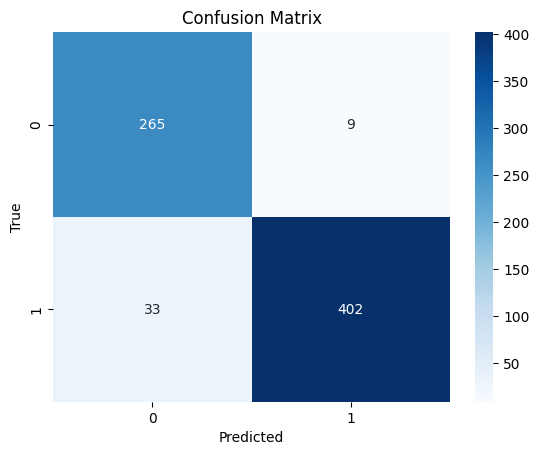

In [ ]:
# Reshape data to fit LSTM's 3D input format (samples, time_steps, features)
# For simplicity, we treat all features as one "time step"
X = np.array(X)  # Convert the DataFrame to numpy array
y = np.array(y)

# Reshape X to (samples, time_steps, features)
# Here, we set time_steps = 1 since it's not time-series data
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split 20/80 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM model construction
model = Sequential()

# Adding LSTM layer (can fine-tune the number of units)
model.add(LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

# Add a Dense output layer (sigmoid for binary classification, softmax for multi-class)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use categorical_crossentropy for multiclass

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

# Predict on test data
y_pred = model.predict(x_test)

# Evaluate using standard metrics
y_pred = (y_pred > 0.5)  # Convert predictions to binary (0 or 1)

# print results of all
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Training and Validation Accuracy Over Epochs

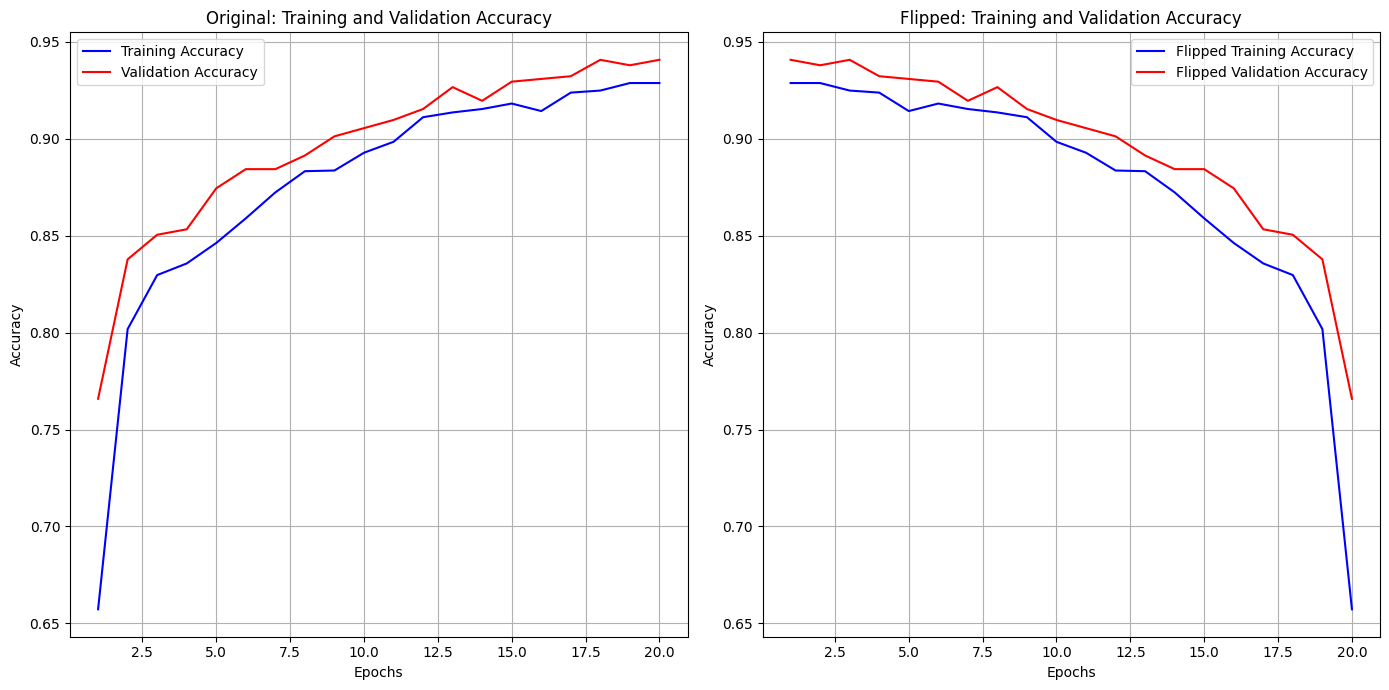

In [ ]:
# Assuming `history` is the object returned by model.fit()
epochs = range(1, len(history.history['accuracy']) + 1)  # Epoch numbers

plt.figure(figsize=(14, 7))

# Original Training and Validation Accuracy Graph
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Original: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Flipped Training and Validation Accuracy Graph
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'][::-1], label='Flipped Training Accuracy', color='blue')
plt.plot(epochs, history.history['val_accuracy'][::-1], label='Flipped Validation Accuracy', color='red')
plt.title('Flipped: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Adjust layout and display
plt.tight_layout()
plt.show()



### Extra models

#### Random Forest (RF)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy (GridSearchCV): 0.9668579377499565
Cross-Validation Accuracy Scores: [0.95774648 0.97530864 0.97001764 0.97883598 0.95238095]
Mean Cross-Validation Accuracy: 0.9668579377499565
Random Forest Model Evaluation:
Accuracy: 0.9732
Precision: 0.9793
Recall: 0.9770
F1-score: 0.9781


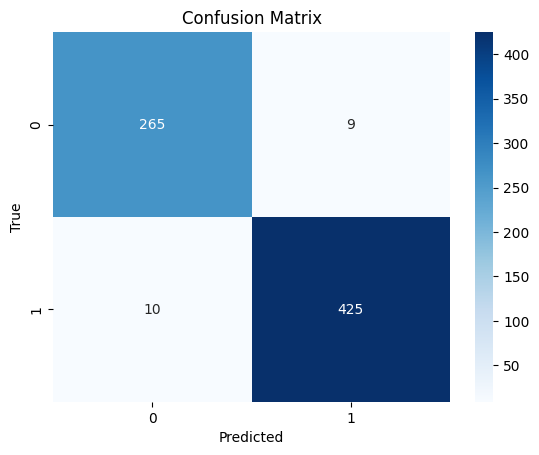

In [ ]:
# Reshape x_train and x_test to 2D for Random Forest
x_train_rf = x_train.reshape(x_train.shape[0], -1)
x_test_rf = x_test.reshape(x_test.shape[0], -1)


# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200], # number of trees
    'max_depth': [None, 10, 20], # max depth of tree
    'min_samples_split': [2, 5, 10] # min sample required to split a node
}

# Grid search cross-validation
rf_cv = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
rf_cv.fit(x_train_rf, y_train)

# we are getting the best parameter and best score from grid search and printing them
best_params = rf_cv.best_params_
best_accuracy = rf_cv.best_score_
# perform cross-validation with the best estimator
cv_scores = cross_val_score(rf_cv.best_estimator_, x_train_rf, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)

#print the results
print("Best Parameters:", best_params)
print("Best Accuracy (GridSearchCV):", best_accuracy)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

# Fit the model with the best parameters
rf_model.set_params(**best_params)
rf_model.fit(x_train_rf, y_train)
y_pred = rf_model.predict(x_test_rf)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# print results of all
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

####Logistic Regression

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy (GridSearchCV): 0.8667101373674143
Cross-Validation Accuracy Scores: [0.87676056 0.86772487 0.89065256 0.85714286 0.84126984]
Mean Cross-Validation Accuracy: 0.8667101373674143
Logistic Regression Model Evaluation:
Accuracy: 0.8773
Precision: 0.8955
Recall: 0.9057
F1-score: 0.9006


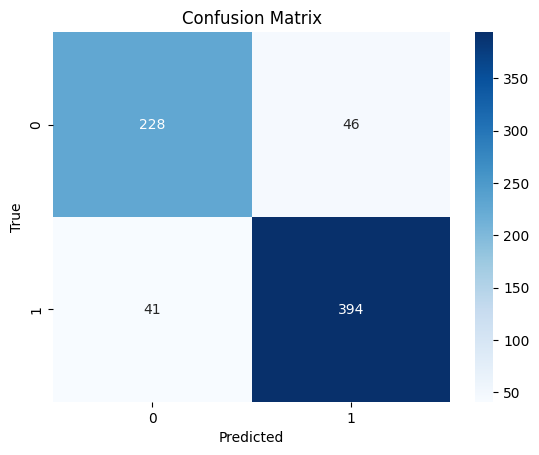

In [ ]:
# Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Define hyperparameter grid
# Adjusted the parameter grid to avoid incompatible combinations
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], # regularization strenght values
    'penalty': ['l1', 'l2'],  # regularization types (lasso, ridge)
    'solver': ['liblinear', 'saga'] # solvers
}

# Grid search cross-validation
lr_cv = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')

# Reshape if x_train has more than 2 dimensions
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

lr_cv.fit(x_train_reshaped, y_train) # fitting in the grid search cross-validation

# we are getting the best parameter and best score from grid search and printing them
best_params = lr_cv.best_params_
best_accuracy = lr_cv.best_score_
cv_scores = cross_val_score(lr_cv.best_estimator_, x_train_reshaped, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)
#print the results
print("Best Parameters:", best_params)
print("Best Accuracy (GridSearchCV):", best_accuracy)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

# Fit the model with the best parameters
lr_model.set_params(**best_params)
lr_model.fit(x_train_reshaped, y_train)
y_pred = lr_model.predict(x_test_reshaped)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# print results of all
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

####Naive Bayes Classifier

Best Parameters: {'var_smoothing': 0.01}
Best Accuracy (GridSearchCV): 0.8730680378567703
Cross-Validation Accuracy Scores: [0.85211268 0.8994709  0.87477954 0.86948854 0.86948854]
Mean Cross-Validation Accuracy: 0.8730680378567703
Naive Bayes Model Evaluation:
Accuracy: 0.8773
Precision: 0.8701
Recall: 0.8872
F1-score: 0.8742


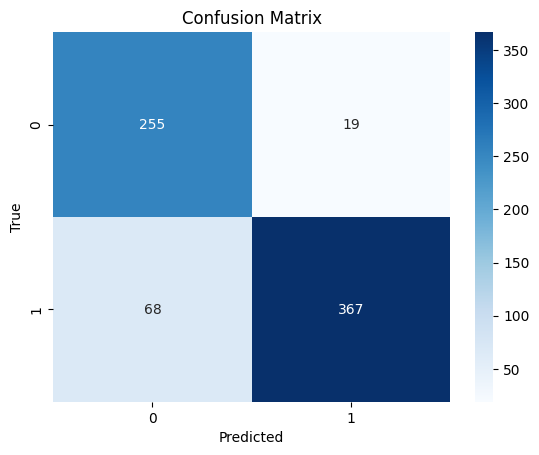

In [ ]:
# Naive Bayes Model
nb_model = GaussianNB()

# Define parameter grid (for GaussianNB, there are no regular hyperparameters like C or kernel,
# but we simulate tuning by focusing on preprocessing or custom parameters if needed
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=10)  # Smoothing parameter
}

# Reshape x_train and x_test to 2D before fitting the model
x_train_2d = x_train.reshape(x_train.shape[0], -1)
x_test_2d = x_test.reshape(x_test.shape[0], -1)

# Grid search cross-validation
nb_cv = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
nb_cv.fit(x_train_2d, y_train)

# we are getting the best parameter and best score from grid search and printing them
best_params = nb_cv.best_params_
best_accuracy = nb_cv.best_score_
cv_scores = cross_val_score(nb_cv.best_estimator_, x_train_2d, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)
# print the result
print("Best Parameters:", best_params)
print("Best Accuracy (GridSearchCV):", best_accuracy)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

# Fit the model with the best parameters
nb_model.set_params(**best_params)
nb_model.fit(x_train_2d, y_train)
y_pred = nb_model.predict(x_test_2d)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# print results of all
print("Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

####Gradient Boosting Classifier

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}
Best Accuracy (GridSearchCV): 0.9615687954889832
Cross-Validation Accuracy Scores: [0.95070423 0.9664903  0.97178131 0.9664903  0.95061728]
Mean Cross-Validation Accuracy: 0.9612166828129268
Gradient Boosting Model Evaluation:
Accuracy: 0.9704
Precision: 0.9734
Recall: 0.9644
F1-score: 0.9685


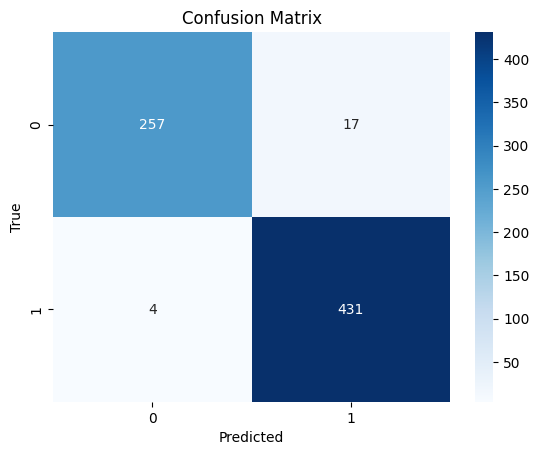

In [ ]:
# Gradient Boosting  Model
gb_model = GradientBoostingClassifier()

# Define parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200], # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate (shrinkage)
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting each base learner
}

# Reshape x_train and x_test to 2D before fitting the model
x_train_2d = x_train.reshape(x_train.shape[0], -1)
x_test_2d = x_test.reshape(x_test.shape[0], -1)

# Grid search cross-validation
gb_cv = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
gb_cv.fit(x_train_2d, y_train)

# we are getting the best parameter and best score from grid search and printing them
best_params = gb_cv.best_params_
best_accuracy = gb_cv.best_score_
cv_scores = cross_val_score(gb_cv.best_estimator_, x_train_2d, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)

#print the results
print("Best Parameters:", best_params)
print("Best Accuracy (GridSearchCV):", best_accuracy)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

# Fit the model with the best parameters
gb_model.set_params(**best_params)
gb_model.fit(x_train_2d, y_train)
y_pred = gb_model.predict(x_test_2d)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# print results of all
print("Gradient Boosting Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### New extra models

#### XGBoost Classifier

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
Best Accuracy (GridSearchCV): 0.9626257545271629
Cross-Validation Accuracy Scores: [0.95598592 0.9664903  0.9664903  0.97178131 0.95238095]
Mean Cross-Validation Accuracy: 0.9626257545271629
XGBoost Model Evaluation:
Accuracy: 0.9704
Precision: 0.9679
Recall: 0.9698
F1-score: 0.9688


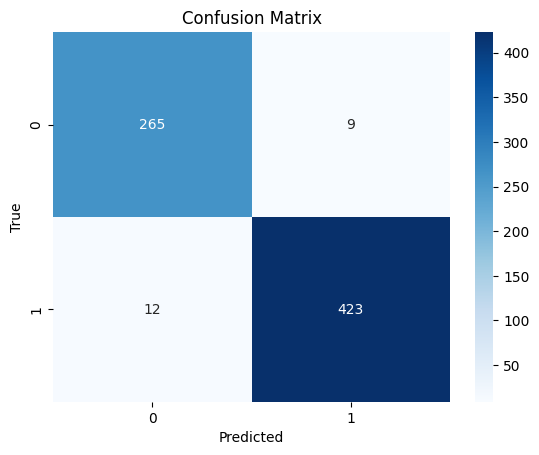

In [ ]:
# XGBoost Classifier Model
xgb_model = XGBClassifier()

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200], # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2], # Learning rate (shrinkage)
    'max_depth': [3, 4, 5], # Maximum depth of trees
    'subsample': [0.8, 0.9, 1.0],# Fraction of samples used for fitting each tree
    'colsample_bytree': [0.8, 0.9, 1.0], # Fraction of features used for fitting each tree
    'gamma': [0, 0.1, 0.2] # Minimum loss reduction required to make a further partition
}

# Reshape x_train and x_test to 2D before fitting the model
x_train_2d = x_train.reshape(x_train.shape[0], -1)
x_test_2d = x_test.reshape(x_test.shape[0], -1)

# Grid search cross-validation
xgb_cv = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
xgb_cv.fit(x_train_2d, y_train)

# we are getting the best parameter and best score from grid search and printing them
best_params = xgb_cv.best_params_
best_accuracy = xgb_cv.best_score_
cv_scores = cross_val_score(xgb_cv.best_estimator_, x_train_2d, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)
# print the results
print("Best Parameters:", best_params)
print("Best Accuracy (GridSearchCV):", best_accuracy)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

# Fit the model with the best parameters
xgb_model.set_params(**best_params)
xgb_model.fit(x_train_2d, y_train)
y_pred = xgb_model.predict(x_test_2d)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# print results of all
print("XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


####LightGBM Classifier

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1708, number of negative: 1128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 2836, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.602257 -> initscore=0.414877
[LightGBM] [Info] Start training from score 0.414877
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

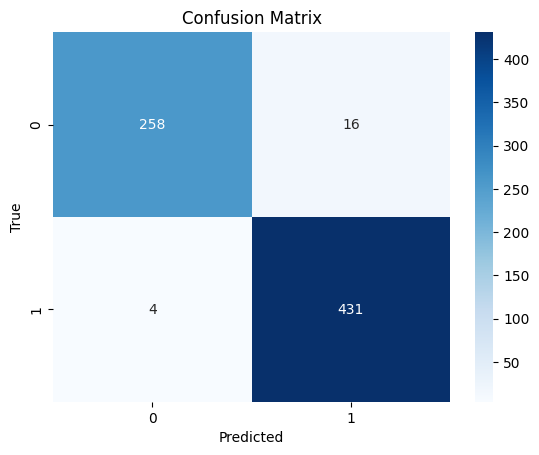

In [ ]:
# define data again as it's was giving us error
Data = pd.read_csv('/content/ASD dataset.csv')
X = Data.drop('Class', axis=1)
y = Data['Class']

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM Classifier Model
lgbm_model = LGBMClassifier()

# Define parameter grid for LightGBM
param_grid = {
    'n_estimators': [100, 200], #number of boosting iterations
    'learning_rate': [0.1], # shrinkage rate
    'max_depth': [4, 5], #max depth of tree
    'num_leaves': [31, 50], #num of leaves in tree
    'subsample': [0.8, 1.0], # fraction of sample
    'colsample_bytree': [0.8, 1.0], #fraction of feature
    'min_child_samples': [20, 30] #min samples required in a leaf node
}

# Parallelize Grid Search with fewer folds (cv=3 instead of cv=5) as it was taking to long
lgbm_cv = GridSearchCV(lgbm_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
lgbm_cv.fit(x_train, y_train)

# we are getting the best parameter and best score from grid search and printing them
best_params = lgbm_cv.best_params_
best_accuracy = lgbm_cv.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy (GridSearchCV):", best_accuracy)

# Fit the model with the best parameters
lgbm_model.set_params(**best_params)
lgbm_model.fit(x_train, y_train)
y_pred = lgbm_model.predict(x_test)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# print results of all
print("LightGBM Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


####Neural Network (MLPClassifier)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best Accuracy (GridSearchCV): 0.9315879354639044
Cross-Validation Accuracy Scores: [0.94820296 0.93227513 0.91428571]
Mean Cross-Validation Accuracy: 0.9315879354639044
Neural Network Model Evaluation:
Accuracy: 0.9577
Precision: 0.9579
Recall: 0.9527
F1-score: 0.9551


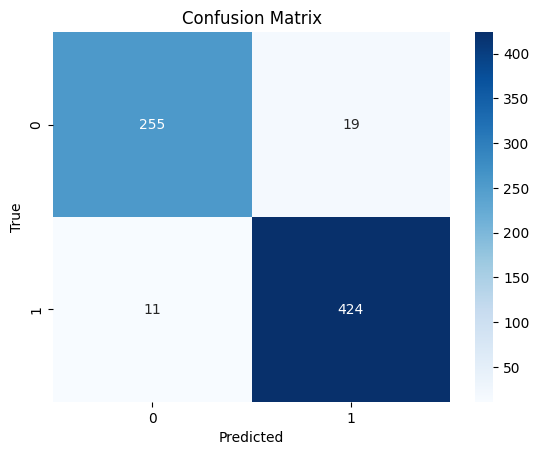

In [ ]:
# Define the Neural Network model with limited iterations
nn_model = MLPClassifier(max_iter=500, random_state=42, warm_start=True)

# Optimized parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)], # Smaller subset of layer sizes (as before it was taking too long)
    'activation': ['relu'],  # relu activiation function
    'solver': ['adam'], # Simplify optimization choice
    'learning_rate': ['adaptive'],  # Focus on adaptive learning rate
    'alpha': [0.0001, 0.001], # Smaller subset of regularization parameters
}

# Convert x_train and x_test to NumPy arrays before reshaping
x_train_np = x_train.to_numpy()
x_test_np = x_test.to_numpy()

# Reshape the NumPy arrays to 2D
x_train_2d = x_train_np.reshape(x_train_np.shape[0], -1)
x_test_2d = x_test_np.reshape(x_test_np.shape[0], -1)

# Grid search cross-validation with 3-fold and parallel processing
nn_cv = GridSearchCV(nn_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
nn_cv.fit(x_train_2d, y_train)

# Get the best parameters and score
best_params = nn_cv.best_params_
best_accuracy = nn_cv.best_score_
cv_scores = cross_val_score(nn_cv.best_estimator_, x_train_2d, y_train, cv=3, scoring='accuracy', n_jobs=-1)
mean_cv_accuracy = np.mean(cv_scores)

# Print results
print("Best Parameters:", best_params)
print("Best Accuracy (GridSearchCV):", best_accuracy)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

# Fit the model with the best parameters
nn_model.set_params(**best_params)
nn_model.fit(x_train_2d, y_train)
y_pred = nn_model.predict(x_test_2d)

# Calculate evaluation metrics for the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Neural Network Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


####AdaBoost Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Best Accuracy (GridSearchCV): 0.9270089673845543
Cross-Validation Accuracy Scores: [0.92957746 0.93121693 0.94532628 0.94003527 0.88888889]
Mean Cross-Validation Accuracy: 0.9270089673845543
AdaBoost Model Evaluation:
Accuracy: 0.9478
Precision: 0.9464
Recall: 0.9433
F1-score: 0.9448


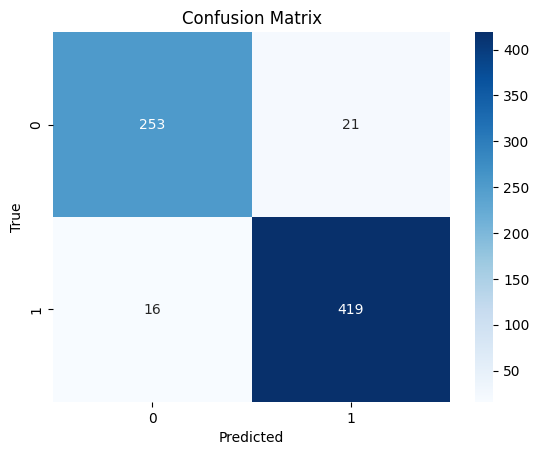

In [ ]:
# AdaBoost Model
ada_model = AdaBoostClassifier()

# Define parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],# Number of boosting stages (iterations)
    'learning_rate': [0.01, 0.1, 1.0], # learning rate to adjust Weighting of each weak classifier
}

# Convert x_train and x_test to NumPy arrays using .values
x_train_np = x_train.values
x_test_np = x_test.values

# Reshape the NumPy arrays to 2D before fitting the model
x_train_2d = x_train_np.reshape(x_train_np.shape[0], -1)
x_test_2d = x_test_np.reshape(x_test_np.shape[0], -1)

# Grid search cross-validation
ada_cv = GridSearchCV(ada_model, param_grid, cv=5, scoring='accuracy')
ada_cv.fit(x_train_2d, y_train)

# we are getting the best parameter and best score from grid search and printing them
best_params = ada_cv.best_params_
best_accuracy = ada_cv.best_score_
cv_scores = cross_val_score(ada_cv.best_estimator_, x_train_2d, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)

# print the results
print("Best Parameters:", best_params)
print("Best Accuracy (GridSearchCV):", best_accuracy)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

# Fit the model with the best parameters
ada_model.set_params(**best_params)
ada_model.fit(x_train_2d, y_train)
y_pred = ada_model.predict(x_test_2d)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# print results of all
print("AdaBoost Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

####CatBoost Classifier



Best Parameters: {'depth': 8, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Best Accuracy (GridSearchCV): 0.9629778672032193
Cross-Validation Accuracy Scores: [0.95774648 0.96825397 0.97001764 0.96825397 0.95061728]
Mean Cross-Validation Accuracy: 0.9629778672032193
CatBoost Model Evaluation:
Accuracy: 0.9704
Precision: 0.9734
Recall: 0.9644
F1-score: 0.9685


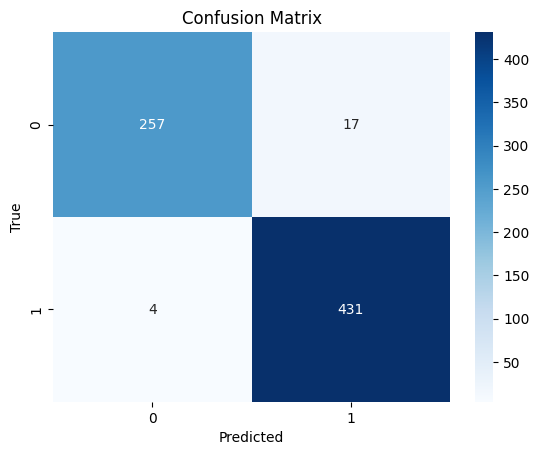

In [ ]:
#model
catboost_model = CatBoostClassifier(learning_rate=0.1, iterations=100, depth=6, verbose=0)

# Define parameter grid for CatBoost
param_grid = {
    'iterations': [100, 200, 300], # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1],# Learning rate
    'depth': [4, 6, 8],    # Depth of the trees
    'l2_leaf_reg': [1, 3, 5],# L2 regularization coefficient
}

# Convert x_train and x_test to NumPy arrays
x_train_np = x_train.values
x_test_np = x_test.values

# Reshape the NumPy arrays to 2D before fitting the model
x_train_2d = x_train_np.reshape(x_train_np.shape[0], -1)
x_test_2d = x_test_np.reshape(x_test_np.shape[0], -1)

# Grid search cross-validation
catboost_cv = GridSearchCV(catboost_model, param_grid, cv=5, scoring='accuracy')
catboost_cv.fit(x_train_2d, y_train)

# we are getting the best parameter and best score from grid search and printing them
best_params = catboost_cv.best_params_
best_accuracy = catboost_cv.best_score_
cv_scores = cross_val_score(catboost_cv.best_estimator_, x_train_2d, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)
#print the results
print("Best Parameters:", best_params)
print("Best Accuracy (GridSearchCV):", best_accuracy)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

# Fit the model with the best parameters
catboost_model.set_params(**best_params)
catboost_model.fit(x_train_2d, y_train)
y_pred = catboost_model.predict(x_test_2d)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# print results of all
print("CatBoost Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


####Bagging Classifier

Best Parameters: {'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 200}
Best Accuracy (GridSearchCV): 0.9658034627518195
Cross-Validation Accuracy Scores: [0.9471831  0.97001764 0.96119929 0.97354497 0.97707231]
Mean Cross-Validation Accuracy: 0.9658034627518195
Bagging Model Evaluation:
Accuracy: 0.9718
Precision: 0.9673
Recall: 0.9743
F1-score: 0.9705


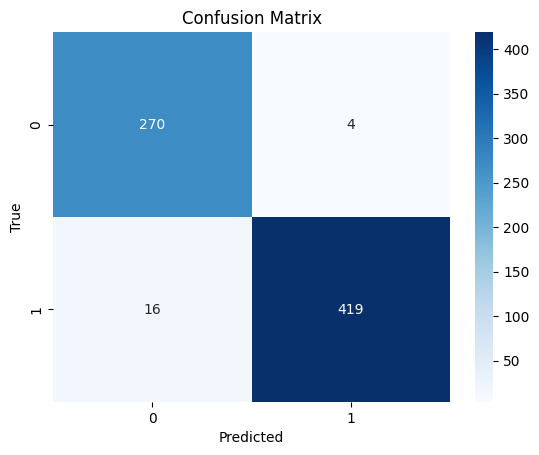

In [ ]:
# Bagging Classifier Model
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Define parameter grid for Bagging Classifier
param_grid = {
    'n_estimators': [50, 100, 200], # Number of base learners (trees)
    'max_samples': [0.5, 0.7, 1.0], # Fraction of samples used for training each base learner
    'max_features': [0.5, 0.7, 1.0], # Fraction of features used for training each base learner
}

# Reshape the NumPy arrays to 2D before fitting the model
x_train_2d = x_train.values.reshape(x_train.shape[0], -1)
x_test_2d = x_test.values.reshape(x_test.shape[0], -1)

# Grid search cross-validation
bagging_cv = GridSearchCV(bagging_model, param_grid, cv=5, scoring='accuracy')
bagging_cv.fit(x_train_2d, y_train)

# we are getting the best parameter and best score from grid search and printing them
best_params = bagging_cv.best_params_
best_accuracy = bagging_cv.best_score_
cv_scores = cross_val_score(bagging_cv.best_estimator_, x_train_2d, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)
# print the results
print("Best Parameters:", best_params)
print("Best Accuracy (GridSearchCV):", best_accuracy)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

# Fit the model with the best parameters
bagging_model.set_params(**best_params)
bagging_model.fit(x_train_2d, y_train)
y_pred = bagging_model.predict(x_test_2d)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# print results of all
print("Bagging Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

####Voting Classifier (Ensemble Method)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Voting Classifier Evaluation:
Mean CV Accuracy: 0.9185
Test Accuracy: 0.9394
Precision: 0.9327
Recall: 0.9425
F1-score: 0.9368


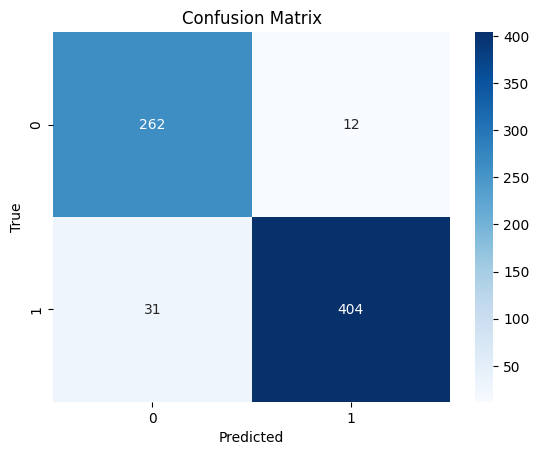

In [ ]:
# Define base models
log_reg = LogisticRegression(max_iter=500, random_state=42)
svm_model = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search on individual models
log_reg_params = {'C': [0.1, 1.0]}
svm_params = {'C': [0.1, 1.0]}
rf_params = {'n_estimators': [50, 100]}

# Perform GridSearchCV for each model
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
svm_cv = GridSearchCV(svm_model, svm_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
rf_cv = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
# Grid search cross-validation
log_reg_cv.fit(x_train, y_train)
svm_cv.fit(x_train, y_train)
rf_cv.fit(x_train, y_train)

# Use the best estimators from individual grid searches
best_log_reg = log_reg_cv.best_estimator_
best_svm = svm_cv.best_estimator_
best_rf = rf_cv.best_estimator_

# Create VotingClassifier using the best models
voting_clf = VotingClassifier(
    estimators=[('lr', best_log_reg), ('svc', best_svm), ('rf', best_rf)],
    voting='soft'  # Soft voting for better probabilistic outcomes
)

Cross-validation for the VotingClassifier
cv_scores = cross_val_score(voting_clf, x_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
mean_cv_accuracy = np.mean(cv_scores)

# Fit the VotingClassifier and evaluate
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print results
print("Voting Classifier Evaluation:")
print(f"Mean CV Accuracy: {mean_cv_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


####Stacking Classifier (Ensemble Method)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Stacking Classifier Evaluation:
Best Parameters: {'final_estimator__C': 1.0}
Mean CV Accuracy: 0.9626
Test Accuracy: 0.9718
Precision: 0.9715
Recall: 0.9689
F1-score: 0.9702


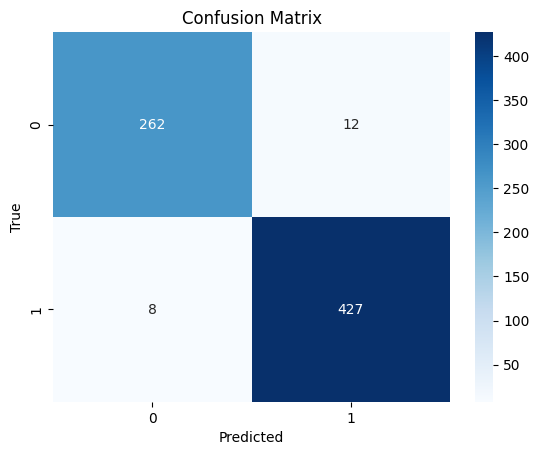

In [ ]:
# Define base classifiers
base_classifiers = [
    ('lr', LogisticRegression(max_iter=500, random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Perform grid search on individual models
log_reg_params = {'C': [0.1, 1.0]}
rf_params = {'n_estimators': [50, 100]}
svm_params = {'C': [0.1, 1.0]}

# Individual grid searches
log_reg_cv = GridSearchCV(base_classifiers[0][1], log_reg_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
rf_cv = GridSearchCV(base_classifiers[1][1], rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
svm_cv = GridSearchCV(base_classifiers[2][1], svm_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
# Grid search cross-validation
log_reg_cv.fit(x_train, y_train)
rf_cv.fit(x_train, y_train)
svm_cv.fit(x_train, y_train)

# Use the best estimators
best_log_reg = log_reg_cv.best_estimator_
best_rf = rf_cv.best_estimator_
best_svm = svm_cv.best_estimator_

# Define stacking classifier using best base classifiers
meta_classifier = LogisticRegression(max_iter=500, random_state=42)
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', best_log_reg),
        ('rf', best_rf),
        ('svm', best_svm)
    ],
    final_estimator=meta_classifier,
    cv=3,  # Reduced CV folds
    n_jobs=-1
)

# Grid search for the meta-classifier
stacking_param_grid = {'final_estimator__C': [0.1, 1.0]}  # Only meta-classifier hyperparameter
stacking_clf_cv = GridSearchCV(stacking_clf, stacking_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
stacking_clf_cv.fit(x_train, y_train)

# Best hyperparameters and cross-validation results
best_params = stacking_clf_cv.best_params_
cv_scores = cross_val_score(stacking_clf_cv.best_estimator_, x_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
mean_cv_accuracy = np.mean(cv_scores)

# Fit the best stacking classifier and evaluate
stacking_clf.set_params(**best_params)
stacking_clf.fit(x_train, y_train)
y_pred = stacking_clf.predict(x_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print results
print("Stacking Classifier Evaluation:")
print(f"Best Parameters: {best_params}")
print(f"Mean CV Accuracy: {mean_cv_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### Artificial Neural Networks (ANNs) - single output neuron using ReLU activation

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters: {'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 500}
Best Accuracy (GridSearchCV): 0.9375940830166183
Cross-Validation Accuracy Scores: [0.92077465 0.94708995 0.95414462 0.9382716  0.92768959]
Mean Cross-Validation Accuracy: 0.9375940830166183
ANN Model Evaluation:
Accuracy: 0.9238
Precision: 0.9161
Recall: 0.9319
F1-score: 0.9214


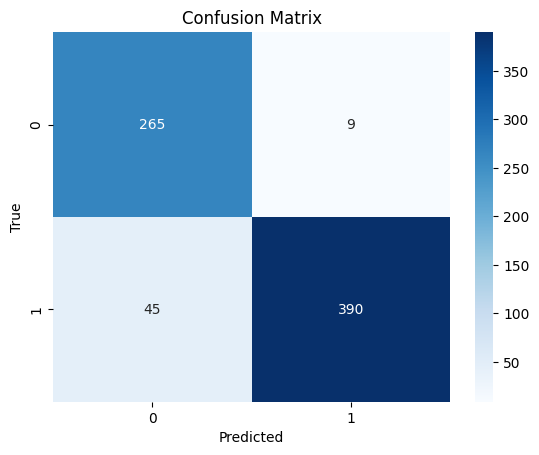

In [ ]:
# Define the Artificial Neural Network (ANN) model
ann_model = MLPClassifier(hidden_layer_sizes=(10, 10), #Two hidden layers with 10 neurons each
                          activation='relu',  # ReLU activation for hidden layers
                          solver='adam', # Optimizer
                          max_iter=1000,# Number of iterations
                          random_state=42)# For reproducibility

# Grid search for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)], # Varying number of neurons in hidden layers
    'learning_rate_init': [0.001, 0.01, 0.1],  # Varying learning rates
    'alpha': [0.0001, 0.001, 0.01], # Regularization parameter
    'max_iter': [500, 1000],# Number of iterations
}

# Grid search cross-validation
grid_search = GridSearchCV(ann_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best hyperparameters and cross-validation results
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
cv_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)

# Print best parameters and evaluation results
print("Best Parameters:", best_params)
print("Best Accuracy (GridSearchCV):", best_accuracy)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

# Train the model with the best parameters
ann_model.set_params(**best_params)
ann_model.fit(x_train, y_train)

# Predict on the test set
y_pred = ann_model.predict(x_test)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# print results of all
print("ANN Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Artificial Neural Networks (ANNs) -  Multi hidden layers (3) using ReLU activation



Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (32, 32, 32), 'learning_rate_init': 0.01, 'max_iter': 500}
Best Accuracy (GridSearchCV): 0.9534484685893136
Cross-Validation Accuracy Scores: [0.97359155 0.96472663 0.95061728 0.96472663 0.91358025]
Mean Cross-Validation Accuracy: 0.9534484685893136
ANN Model Evaluation:
Accuracy: 0.9704
Precision: 0.9697
Recall: 0.9678
F1-score: 0.9687


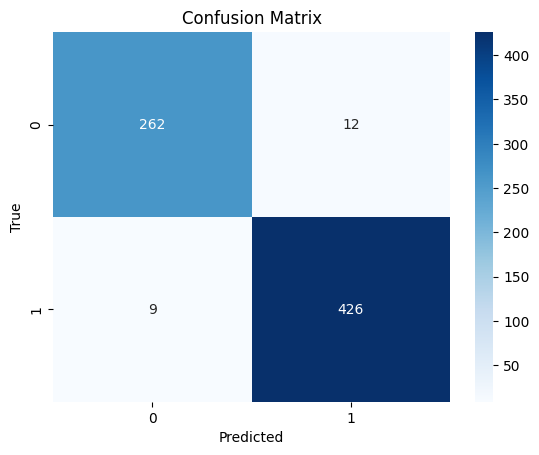

In [ ]:
# Define the Artificial Neural Network (ANN) model with 3 hidden layers
ann_model = MLPClassifier(hidden_layer_sizes=(64, 64, 64),  # Three hidden layers, each with 64 neurons
                          activation='relu',  # ReLU activation function for hidden layers
                          solver='adam',# Optimizer
                          max_iter=1000, # Number of iterations
                          random_state=42)# For reproducibility

# Grid search for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(64, 64, 64), (128, 128, 128), (32, 32, 32)],  # Different architectures for hidden layers
    'learning_rate_init': [0.001, 0.01, 0.1], # Varying learning rates
    'alpha': [0.0001, 0.001, 0.01], # Regularization parameter
    'max_iter': [500, 1000],# Number of iterations
}

# Grid search cross-validation
grid_search = GridSearchCV(ann_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best hyperparameters and cross-validation results
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
cv_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)

# Print best parameters and evaluation results
print("Best Parameters:", best_params)
print("Best Accuracy (GridSearchCV):", best_accuracy)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

# Train the model with the best parameters
ann_model.set_params(**best_params)
ann_model.fit(x_train, y_train)

# Predict on the test set
y_pred = ann_model.predict(x_test)

#calculate the evaluation metrics for the model on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# print results of all
print("ANN Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### Artificial Neural Networks (ANNs) -  Multi hidden layers (3) using Sigmoid activation


Sigmoid Model - Best Parameters: {'alpha': 0.001, 'hidden_layer_sizes': (32, 32, 32), 'learning_rate_init': 0.01, 'max_iter': 500}
Sigmoid Model - Best Accuracy (GridSearchCV): 0.9559269195419429
Sigmoid Model - Cross-Validation Accuracy Scores: [0.9471831  0.96825397 0.95943563 0.9664903  0.9382716 ]
Sigmoid Model - Mean Cross-Validation Accuracy: 0.9559269195419429
Sigmoid Model Evaluation:
Accuracy: 0.9661
Precision: 0.9692
Recall: 0.9596
F1-score: 0.9640


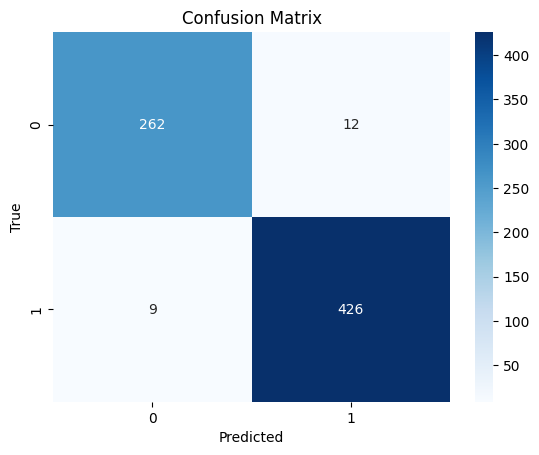

In [ ]:
# Define the Artificial Neural Network (ANN) model with 3 hidden layers (Sigmoid activation)
ann_model_sigmoid = MLPClassifier(hidden_layer_sizes=(64, 64, 64), # Three hidden layers, each with 64 neurons
                                  activation='logistic',  # Change 'sigmoid' to 'logistic'
                                  solver='adam',  # Optimizer
                                  max_iter=1000, # Number of iterations
                                  random_state=42) # For reproducibility

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(64, 64, 64), (128, 128, 128), (32, 32, 32)],  # Different architectures for hidden layers
    'learning_rate_init': [0.001, 0.01, 0.1],# Varying learning rates
    'alpha': [0.0001, 0.001, 0.01], # Regularization parameter
    'max_iter': [500, 1000], # Number of iterations
}

# Grid search cross-validation for Sigmoid model
grid_search_sigmoid = GridSearchCV(ann_model_sigmoid, param_grid, cv=5, scoring='accuracy')
grid_search_sigmoid.fit(x_train, y_train)

# Best hyperparameters and cross-validation results for Sigmoid model
best_params_sigmoid = grid_search_sigmoid.best_params_
best_accuracy_sigmoid = grid_search_sigmoid.best_score_
cv_scores_sigmoid = cross_val_score(grid_search_sigmoid.best_estimator_, x_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy_sigmoid = np.mean(cv_scores_sigmoid)

# Print best parameters and evaluation results for Sigmoid model
print("Sigmoid Model - Best Parameters:", best_params_sigmoid)
print("Sigmoid Model - Best Accuracy (GridSearchCV):", best_accuracy_sigmoid)
print("Sigmoid Model - Cross-Validation Accuracy Scores:", cv_scores_sigmoid)
print("Sigmoid Model - Mean Cross-Validation Accuracy:", mean_cv_accuracy_sigmoid)

# Train the Sigmoid model with the best parameters
ann_model_sigmoid.set_params(**best_params_sigmoid)
ann_model_sigmoid.fit(x_train, y_train)

# Predict on the test set for Sigmoid model
y_pred_sigmoid = ann_model_sigmoid.predict(x_test)

# Calculate the evaluation metrics for the Sigmoid model on the test set
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
precision_sigmoid = precision_score(y_test, y_pred_sigmoid, average='macro')
recall_sigmoid = recall_score(y_test, y_pred_sigmoid, average='macro')
f1_sigmoid = f1_score(y_test, y_pred_sigmoid, average='macro')

# Print results of the Sigmoid model evaluation
print("Sigmoid Model Evaluation:")
print(f"Accuracy: {accuracy_sigmoid:.4f}")
print(f"Precision: {precision_sigmoid:.4f}")
print(f"Recall: {recall_sigmoid:.4f}")
print(f"F1-score: {f1_sigmoid:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
